### Note: This template is used to save your time. If there are some typos in this file, please **refer to the original PDF file of problems.**


## Remember **make your own copy first**!! Otherwise, your code will not be stored.

Problem Set 2

CS 6375

Due: 3/6/2022 by 11:59pm

Note: all answers should be accompanied by explanations and relevant code for full credit. All
code (Python or MATLAB only) should be turned in with your answers to the following questions. Python is preferred.  
Late homeworks will not be accepted. 

The following code help you download the data files needed for the problems below. After running code, these files will appear in the current folder.

In [190]:
# Downloading data files for you.
# Remember to run this cell!!

!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/mush_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/mush_train.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_train.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_validation.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/wdbc_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/wdbc_train.data


File 'mush_test.data' already there; not retrieving.

File 'mush_train.data' already there; not retrieving.

File 'park_test.data' already there; not retrieving.

File 'park_train.data' already there; not retrieving.

File 'park_validation.data' already there; not retrieving.

File 'wdbc_test.data' already there; not retrieving.

File 'wdbc_train.data' already there; not retrieving.



# Problem 1 : Parkinson’s Disease (40 pts)

For this problem, you will use the cancer data set provided with this problem set. The data has been
divided into three pieces park train.data, park validation.data, and park test.data. These data sets
were generated using the UCI Parkinsons Data Set data set (follow the link for information about
the format of the data). Note that class label, health status of the subject, is the first column in
the data set. All code (Python or MATLAB only) should be turned in with your answers to the
following questions.

## 1. Primal SVMs



### (a) Using gradient descent or quadratic programming, apply the SVM with slack formulation to train a classifier for each choice of $c \in \{10^{-4}, 10^{-3}, ..., 10^3, 10^4\}$ without using any feature maps.

In [191]:
# To be completed. Please write code or words below the problem.
#Grab Data
import numpy as np
import pandas as pd
import sys, os

col_names = ['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']
data =  pd.read_csv('park_train.data', sep="," , names = col_names)
#print(data)

In [192]:
Y = data['y'].values
Y = Y.reshape(-1,1)
print('Y dimention: ',Y.shape)
X = data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X dimnetion: ',X.shape)

Y dimention:  (78, 1)
X dimnetion:  (78, 22)


In [193]:
import numpy as np

def poly_func(X,poly_case):#Use linear only
  if poly_case == 'Linear':
    return X

def K(X1,X2,kernel_option,gamma = 1,poly_case = 'Linear'):
  if kernel_option == 'Gaussian':#For Gaussian Later
    return  np.exp(-gamma * np.linalg.norm(X1 - X2)**2)/2
  if kernel_option == 'Polynomial':
    v1 = poly_func(X1,poly_case)
    v2 = poly_func(X2,poly_case)
    return v1.dot(v2)

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers

def SVM_with_Kernel(C,X,Y,kernel_option, gamma = 1,poly_case = 'Linear'):
  m,n = X.shape
  #C = 0.1
  #K = linear_kernel(X, X, degree = 2, intercept = 1)
  H = np.zeros([m,m])
  for i in range(m):
    for j in range(m):
      H[i,j] = Y[i]*Y[j] * K(X[i],X[j], kernel_option,gamma, poly_case)

#Converting into cvxopt format
  P = cvxopt_matrix(H)
  q = cvxopt_matrix(-np.ones((m, 1)))
  A = cvxopt_matrix(Y.reshape(1, -1)* 1.)
  b = cvxopt_matrix(np.zeros(1))          
  G = cvxopt_matrix(np.vstack((np.eye(m) * -1, np.eye(m))))        
  h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
#Run solver
  solvers.options['show_progress'] = False
  sol = solvers.qp(P, q, G, h, A, b);
  lambdas = np.array(sol['x']);

  return lambdas

In [194]:
kernel_option = 'Polynomial'
poly_case = 'Linear'
dims = {'Linear':22}
for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
  print('\nCurrent C: ',C_Values)
  lambdas = SVM_with_Kernel(C_Values,X,Y,kernel_option, poly_case)

  modified_X = np.zeros([Y.shape[0],dims[poly_case]])
  for n in range(Y.shape[0]):
    modified_X[n] = poly_func(X[n],poly_case)

  w = ((Y * lambdas).T @ modified_X).reshape(-1,1);
  S = (lambdas >= 0).flatten();
  #print(S)
  b = Y[S] - np.dot(modified_X[S], w);
  #print('lambdas = ',lambdas[lambdas > 0])

  Y_pred = modified_X.dot(w) + b[0]
  print('w = ', w.flatten())
  print('b = ', b[0])
  res = sum([int(Y[i] == np.sign(Y_pred[i])) for i in range(Y.shape[0])])
  print('Accuracy:', res)


Current C:  0.0001
w =  [-1.38830763e-22 -1.41054452e-22 -1.21183796e-23 -1.10012625e-26
 -4.86739902e-29 -6.94055410e-27 -2.51144042e-27 -2.08089444e-26
  2.88202801e-26  3.66346646e-25  1.17632067e-26  2.81547003e-26
  2.75478799e-26  3.52952680e-26 -8.65345948e-26 -2.11670814e-23
 -3.15205913e-25 -2.61591919e-25  4.21286768e-24 -2.48799775e-27
 -1.75887651e-24 -2.40922199e-26]
b =  [1.]
Accuracy: 61

Current C:  0.001
w =  [-4.50967867e-23 -2.97527599e-23 -5.92917295e-23  4.93984757e-27
  3.92178130e-29  3.73304345e-27  2.19516724e-27  1.11908861e-26
 -6.15333479e-27 -7.56167637e-26 -1.06893072e-27 -4.16367281e-27
 -1.12536111e-26 -3.18933328e-27  6.84466796e-26 -9.23671803e-24
  1.09848313e-25 -4.15421699e-26  1.40510135e-24 -4.69037631e-26
  1.95297757e-26  5.46941443e-26]
b =  [1.]
Accuracy: 61

Current C:  0.01
w =  [-4.36396630e-24  3.60196393e-23  1.91860143e-23  1.32647822e-26
  8.77722386e-29  8.49433676e-27  7.58444759e-27  2.54665355e-26
  2.47134009e-26  2.42109140e-25  

### (b) What is the accuracy of the learned classifier on the training set for each value of $c$?

The accuracies on training data are 61,61,61,44,3,17,53,61,8 corresponding to c = 1e-4 to 1e4 

### (c) Use the validation set to select the best value of $c$. What is the accuracy on the validation set for each value of $c$?

In [195]:
# To be completed
validData =  pd.read_csv('park_validation.data', sep="," , names = col_names)
Y_Valid = validData['y'].values
Y_Valid = Y_Valid.reshape(-1,1)
print('Y_Valid dimention: ',Y_Valid.shape)
X_Valid = validData[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X_Valid dimnetion: ',X_Valid.shape)

for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
  print('\nCurrent C: ',C_Values)
  lambdas = SVM_with_Kernel(C_Values,X,Y,kernel_option, poly_case)

  modified_X = np.zeros([Y.shape[0],dims[poly_case]])

  for n in range(Y.shape[0]):
    modified_X[n] = poly_func(X[n],poly_case)

  w = ((Y * lambdas).T @ modified_X).reshape(-1,1);
  S = (lambdas >= 0).flatten();
  #print(S)
  b = Y[S] - np.dot(modified_X[S], w);
  #print('lambdas = ',lambdas[lambdas > 0])
#New validation data plot in here#
  modified_X_Valid = np.zeros([Y_Valid.shape[0],dims[poly_case]])
  for n in range(Y_Valid.shape[0]):
    modified_X_Valid[n] = poly_func(X_Valid[n],poly_case)
  Y_Valid_pred = modified_X_Valid.dot(w) + b[0]
  print('w = ', w.flatten())
  print('b = ', b[0])
  res = sum([int(Y_Valid[i] == np.sign(Y_Valid_pred[i])) for i in range(Y_Valid.shape[0])])
  print('Accuracy:', res)

Y_Valid dimention:  (58, 1)
X_Valid dimnetion:  (58, 22)

Current C:  0.0001
w =  [-1.38830763e-22 -1.41054452e-22 -1.21183796e-23 -1.10012625e-26
 -4.86739902e-29 -6.94055410e-27 -2.51144042e-27 -2.08089444e-26
  2.88202801e-26  3.66346646e-25  1.17632067e-26  2.81547003e-26
  2.75478799e-26  3.52952680e-26 -8.65345948e-26 -2.11670814e-23
 -3.15205913e-25 -2.61591919e-25  4.21286768e-24 -2.48799775e-27
 -1.75887651e-24 -2.40922199e-26]
b =  [1.]
Accuracy: 43

Current C:  0.001
w =  [-4.50967867e-23 -2.97527599e-23 -5.92917295e-23  4.93984757e-27
  3.92178130e-29  3.73304345e-27  2.19516724e-27  1.11908861e-26
 -6.15333479e-27 -7.56167637e-26 -1.06893072e-27 -4.16367281e-27
 -1.12536111e-26 -3.18933328e-27  6.84466796e-26 -9.23671803e-24
  1.09848313e-25 -4.15421699e-26  1.40510135e-24 -4.69037631e-26
  1.95297757e-26  5.46941443e-26]
b =  [1.]
Accuracy: 43

Current C:  0.01
w =  [-4.36396630e-24  3.60196393e-23  1.91860143e-23  1.32647822e-26
  8.77722386e-29  8.49433676e-27  7.584447

The accuracies for each c using validation data are 43,43,43,28,2,12,40,43,3 corresponding to c = 1e-4 to 1e4

### (d) Report the accuracy on the test set for the selected classifier

In [196]:
# To be completed
TestData =  pd.read_csv('park_test.data', sep="," , names = col_names)
Y_Test = TestData['y'].values
Y_Test = Y_Test.reshape(-1,1)
print('Y_Test dimention: ',Y_Test.shape)
X_Test = TestData[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X_Test dimnetion: ',X_Test.shape)

for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
  print('\nCurrent C: ',C_Values)
  lambdas = SVM_with_Kernel(C_Values,X,Y,kernel_option, poly_case)

  modified_X = np.zeros([Y.shape[0],dims[poly_case]])
  for n in range(Y.shape[0]):
    modified_X[n] = poly_func(X[n],poly_case)

  w = ((Y * lambdas).T @ modified_X).reshape(-1,1);
  S = (lambdas >= 0).flatten();
  #print(S)
  b = Y[S] - np.dot(modified_X[S], w);
  #print('lambdas = ',lambdas[lambdas > 0])
#New validation data plot in here#
  modified_X_Test = np.zeros([Y_Test.shape[0],dims[poly_case]])
  for n in range(Y_Test.shape[0]):
    modified_X_Test[n] = poly_func(X_Test[n],poly_case)
    
  Y_Test_pred = modified_X_Test.dot(w) + b[0]
  print('w = ', w.flatten())
  print('b = ', b[0])
  res = sum([int(Y_Test[i] == np.sign(Y_Test_pred[i])) for i in range(Y_Test.shape[0])])
  print('Accuracy:', res)

Y_Test dimention:  (59, 1)
X_Test dimnetion:  (59, 22)

Current C:  0.0001
w =  [-1.38830763e-22 -1.41054452e-22 -1.21183796e-23 -1.10012625e-26
 -4.86739902e-29 -6.94055410e-27 -2.51144042e-27 -2.08089444e-26
  2.88202801e-26  3.66346646e-25  1.17632067e-26  2.81547003e-26
  2.75478799e-26  3.52952680e-26 -8.65345948e-26 -2.11670814e-23
 -3.15205913e-25 -2.61591919e-25  4.21286768e-24 -2.48799775e-27
 -1.75887651e-24 -2.40922199e-26]
b =  [1.]
Accuracy: 43

Current C:  0.001
w =  [-4.50967867e-23 -2.97527599e-23 -5.92917295e-23  4.93984757e-27
  3.92178130e-29  3.73304345e-27  2.19516724e-27  1.11908861e-26
 -6.15333479e-27 -7.56167637e-26 -1.06893072e-27 -4.16367281e-27
 -1.12536111e-26 -3.18933328e-27  6.84466796e-26 -9.23671803e-24
  1.09848313e-25 -4.15421699e-26  1.40510135e-24 -4.69037631e-26
  1.95297757e-26  5.46941443e-26]
b =  [1.]
Accuracy: 43

Current C:  0.01
w =  [-4.36396630e-24  3.60196393e-23  1.91860143e-23  1.32647822e-26
  8.77722386e-29  8.49433676e-27  7.58444759

The accuracies for each c using test data are 43,43,42,26,1,14,38,42,5 corresponding to c = 1e-4 to 1e4

## 2. Dual SVMs with Gaussian Kernels

### (a) Using quadratic programming, apply the dual of the SVM with slack formulation to train a classifier for each choice of $c \in \{10^{-4}, 10^{-3}, ..., 10^3, 10^4\}$ using a Gaussian kernel with $\sigma^2 \in \{10^{-3}, ..., 10^{3}\}$.

In [213]:
roundNo = 0
for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
    for Variance in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
        roundNo = roundNo + 1
        lambdas = SVM_with_Kernel(C_Values,X,Y,'Gaussian', gamma = 1/ (Variance * X.shape[1]))
        supports = X[np.where(lambdas > 0)[0]]
        #print('Indices of support vectors:\n',np.where(lambdas > 0)[0])
        #print('Support Vectors:\n',supports)
        similarities = np.zeros([Y.shape[0],supports.shape[0]])
        for m in range(Y.shape[0]):
          for s in range(supports.shape[0]):
            similarities[m,s] = K(X[m],supports[s],kernel_option='Gaussian',gamma=1/ (Variance * X.shape[1]))
        lambdas = SVM_with_Kernel(C_Values,similarities,Y,'Polynomial',poly_case='Linear')

        w = ((Y * lambdas).T @ similarities).reshape(-1,1);
        S = (lambdas > 0).flatten();
        b = Y[S] - np.dot(similarities[S], w);
        Y_pred = similarities.dot(w) + b[0]
        res = sum([int(Y[i] == np.sign(Y_pred[i])) for i in range(Y.shape[0])])
        print('Round:', roundNo,'Current C:',C_Values,'Current Variance', Variance, 'Accuracy:', res)

Round: 1 Current C: 0.0001 Current Variance 0.001 Accuracy: 61
Round: 2 Current C: 0.0001 Current Variance 0.01 Accuracy: 61
Round: 3 Current C: 0.0001 Current Variance 0.1 Accuracy: 61
Round: 4 Current C: 0.0001 Current Variance 1.0 Accuracy: 37
Round: 5 Current C: 0.0001 Current Variance 10.0 Accuracy: 58
Round: 6 Current C: 0.0001 Current Variance 100.0 Accuracy: 61
Round: 7 Current C: 0.0001 Current Variance 1000.0 Accuracy: 61
Round: 8 Current C: 0.001 Current Variance 0.001 Accuracy: 17
Round: 9 Current C: 0.001 Current Variance 0.01 Accuracy: 12
Round: 10 Current C: 0.001 Current Variance 0.1 Accuracy: 46
Round: 11 Current C: 0.001 Current Variance 1.0 Accuracy: 61
Round: 12 Current C: 0.001 Current Variance 10.0 Accuracy: 38
Round: 13 Current C: 0.001 Current Variance 100.0 Accuracy: 49
Round: 14 Current C: 0.001 Current Variance 1000.0 Accuracy: 55
Round: 15 Current C: 0.01 Current Variance 0.001 Accuracy: 17
Round: 16 Current C: 0.01 Current Variance 0.01 Accuracy: 12
Round: 

Accuracy: 9


### (b) What is the accuracy of the learned classifier on the training set for each pair of $c$ and $\sigma^2$?

Reported in a

###(c) Use the validation set to select the best value of $c$ and $\sigma^2$. What is the accuracy on the validation set for each pair of $c$ and $\sigma^2$?

In [220]:
prevRes = 0
roundNo = 0
for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
    for Variance in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
        roundNo = roundNo + 1
        lambdas = SVM_with_Kernel(C_Values,X,Y,'Gaussian', gamma = 1/ (Variance * X.shape[1]))
        supports = X[np.where(lambdas > 0)[0]]
        #print('Indices of support vectors:\n',np.where(lambdas > 0)[0])
        #print('Support Vectors:\n',supports)
        similarities = np.zeros([Y.shape[0],supports.shape[0]])
        for m in range(Y.shape[0]):
          for s in range(supports.shape[0]):
            similarities[m,s] = K(X[m],supports[s],kernel_option='Gaussian',gamma=1/ (Variance * X.shape[1]))
        lambdas = SVM_with_Kernel(C_Values,similarities,Y,'Polynomial',poly_case='Linear')

        w = ((Y * lambdas).T @ similarities).reshape(-1,1);
        S = (lambdas > 0).flatten();
        b = Y[S] - np.dot(similarities[S], w);
        
        
        Y_Valid_pred = similarities.dot(w) + b[0]
        res = sum([int(Y_Valid[i] == np.sign(Y_Valid_pred[i])) for i in range(Y_Valid.shape[0])])
        print('Round:', roundNo,'Current C:',C_Values,'Current Variance', Variance, 'Accuracy:', res)
        if res > prevRes:
            prevRes = res
            
print('Best Accuracy is:',prevRes)

Round: 1 Current C: 0.0001 Current Variance 0.001 Accuracy: 43
Round: 2 Current C: 0.0001 Current Variance 0.01 Accuracy: 43
Round: 3 Current C: 0.0001 Current Variance 0.1 Accuracy: 43
Round: 4 Current C: 0.0001 Current Variance 1.0 Accuracy: 26
Round: 5 Current C: 0.0001 Current Variance 10.0 Accuracy: 40
Round: 6 Current C: 0.0001 Current Variance 100.0 Accuracy: 43
Round: 7 Current C: 0.0001 Current Variance 1000.0 Accuracy: 43
Round: 8 Current C: 0.001 Current Variance 0.001 Accuracy: 5
Round: 9 Current C: 0.001 Current Variance 0.01 Accuracy: 4
Round: 10 Current C: 0.001 Current Variance 0.1 Accuracy: 29
Round: 11 Current C: 0.001 Current Variance 1.0 Accuracy: 43
Round: 12 Current C: 0.001 Current Variance 10.0 Accuracy: 25
Round: 13 Current C: 0.001 Current Variance 100.0 Accuracy: 30
Round: 14 Current C: 0.001 Current Variance 1000.0 Accuracy: 37
Round: 15 Current C: 0.01 Current Variance 0.001 Accuracy: 5
Round: 16 Current C: 0.01 Current Variance 0.01 Accuracy: 4
Round: 17 C

### (d) Report the accuracy on the test set for the selected classifier.

In [217]:
prevRes = 0
roundNo = 0
for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
    for Variance in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
        roundNo = roundNo + 1
        lambdas = SVM_with_Kernel(C_Values,X,Y,'Gaussian', gamma = 1/ (Variance * X.shape[1]))
        supports = X[np.where(lambdas > 0)[0]]
        #print('Indices of support vectors:\n',np.where(lambdas > 0)[0])
        #print('Support Vectors:\n',supports)
        similarities = np.zeros([Y.shape[0],supports.shape[0]])
        for m in range(Y.shape[0]):
          for s in range(supports.shape[0]):
            similarities[m,s] = K(X[m],supports[s],kernel_option='Gaussian',gamma=1/ (Variance * X.shape[1]))
        lambdas = SVM_with_Kernel(C_Values,similarities,Y,'Polynomial',poly_case='Linear')

        w = ((Y * lambdas).T @ similarities).reshape(-1,1);
        S = (lambdas > 0).flatten();
        b = Y[S] - np.dot(similarities[S], w);
        
        Y_Test_pred = similarities.dot(w) + b[0]
        res = sum([int(Y_Test[i] == np.sign(Y_Test_pred[i])) for i in range(Y_Test.shape[0])])
        print('Round:', roundNo,'Current C:',C_Values,'Current Variance', Variance, 'Accuracy:', res)
        if res > prevRes:
            prevRes = res
            
print('Best Accuracy is:',prevRes)

Round: 1 Current C: 0.0001 Current Variance 0.001 Accuracy: 43
Round: 2 Current C: 0.0001 Current Variance 0.01 Accuracy: 43
Round: 3 Current C: 0.0001 Current Variance 0.1 Accuracy: 43
Round: 4 Current C: 0.0001 Current Variance 1.0 Accuracy: 25
Round: 5 Current C: 0.0001 Current Variance 10.0 Accuracy: 40
Round: 6 Current C: 0.0001 Current Variance 100.0 Accuracy: 43
Round: 7 Current C: 0.0001 Current Variance 1000.0 Accuracy: 43
Round: 8 Current C: 0.001 Current Variance 0.001 Accuracy: 5
Round: 9 Current C: 0.001 Current Variance 0.01 Accuracy: 4
Round: 10 Current C: 0.001 Current Variance 0.1 Accuracy: 30
Round: 11 Current C: 0.001 Current Variance 1.0 Accuracy: 43
Round: 12 Current C: 0.001 Current Variance 10.0 Accuracy: 24
Round: 13 Current C: 0.001 Current Variance 100.0 Accuracy: 32
Round: 14 Current C: 0.001 Current Variance 1000.0 Accuracy: 35
Round: 15 Current C: 0.01 Current Variance 0.001 Accuracy: 5
Round: 16 Current C: 0.01 Current Variance 0.01 Accuracy: 4
Round: 17 C

## 3. Which of these approaches (if any) should be preferred for this classification task? Explain.

From the data observed, since Primal SVM using linear polynomial yields better accuracy in test data sets, Primal SVM should be preferred.

# Problem 2: Method of Lagrange Multipliers (15 pts)

Suppose that we modified the objective function in the SVM with slack formulation to be a quadratic
penalty instead of a linear penalty, that is minimize $\frac{1}{2}\Vert w\Vert^2 +c\sum_i \xi_i^2$ subject to the same constraints as the standard SVM with slack. What is the dual of this new quadratic penalized SVM with slack problem for a fixed c? Can the kernel trick still be applied?

Answered in attached PDF

# Problem 3: Poisonous Mushrooms? (25 pts)
For this problem, you will use the mushroom data set provided with this problem set. The data has
been divided into two pieces mush train.data and mush test.data. These data sets were generated
using the UCI Mushroom data set (follow the link for information about the format of the data).
Note that the class label is the first column in the data set.

## 1. Assuming you break ties using the attribute that occurs **last** (left to right) in the data, draw the resulting decision tree and report the maximum information gain for each node that you added to the tree.

In [270]:
import pandas as pd # data processing
import numpy as np # working with arrays
import math

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

col_names = ['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']
mushTrainData =  pd.read_csv('mush_train.data', sep="," , names = col_names)
mushTestData =  pd.read_csv('mush_test.data', sep="," , names = col_names)
print(mushTrainData.head())
print(mushTestData.head())

   y x1 x2 x3 x4 x5 x6 x7 x8 x9  ... x13 x14 x15 x16 x17 x18 x19 x20 x21 x22
0  e  f  f  n  t  n  f  c  b  n  ...   s   p   g   p   w   o   p   n   y   d
1  e  x  y  y  t  a  f  c  b  n  ...   y   w   w   p   w   o   p   n   y   p
2  p  x  y  n  t  p  f  c  n  k  ...   s   w   w   p   w   o   p   k   s   g
3  p  x  s  n  f  y  f  c  n  b  ...   k   w   w   p   w   o   e   w   v   p
4  e  x  f  w  t  l  f  w  n  w  ...   s   w   w   p   w   o   p   u   v   d

[5 rows x 23 columns]
   y x1 x2 x3 x4 x5 x6 x7 x8 x9  ... x13 x14 x15 x16 x17 x18 x19 x20 x21 x22
0  p  x  f  y  f  f  f  c  b  p  ...   k   n   b   p   w   o   l   h   y   g
1  p  x  f  g  f  f  f  c  b  g  ...   k   p   n   p   w   o   l   h   v   p
2  p  x  f  y  f  f  f  c  b  g  ...   k   n   b   p   w   o   l   h   y   p
3  e  f  y  n  t  n  f  c  b  n  ...   s   g   p   p   w   o   p   k   y   d
4  p  f  f  g  f  f  f  c  b  p  ...   k   p   p   p   w   o   l   h   y   g

[5 rows x 23 columns]


In [271]:
for i in mushTrainData.y.values:
    if i  == 'e':#eatable = 0; poison =1 
        mushTrainData.y.replace(i, 0, inplace = True)
    elif i == 'p':
        mushTrainData.y.replace(i, 1, inplace = True)

df1 = mushTrainData.replace('a', 1)
df1 = df1.replace('b', 2)
df1 = df1.replace('c', 3)
df1 = df1.replace('d', 4)
df1 = df1.replace('e', 5)
df1 = df1.replace('f', 6)
df1 = df1.replace('g', 7)
df1 = df1.replace('h', 8)
df1 = df1.replace('i', 9)
df1 = df1.replace('j', 10)
df1 = df1.replace('k', 11)
df1 = df1.replace('l', 12)
df1 = df1.replace('m', 13)
df1 = df1.replace('n', 14)
df1 = df1.replace('o', 15)
df1 = df1.replace('p', 16)
df1 = df1.replace('q', 17)
df1 = df1.replace('r', 18)
df1 = df1.replace('s', 19)
df1 = df1.replace('t', 20)
df1 = df1.replace('u', 21)
df1 = df1.replace('v', 22)
df1 = df1.replace('w', 23)
df1 = df1.replace('x', 24)
df1 = df1.replace('y', 25)
df1 = df1.replace('z', 26)
print(df1)

for i in mushTestData.y.values:
    if i  == 'e':#eatable = 0; poison =1 
        mushTestData.y.replace(i, 0, inplace = True)
    elif i == 'p':
        mushTestData.y.replace(i, 1, inplace = True)

df2 = mushTestData.replace('a', 1)
df2 = df2.replace('b', 2)
df2 = df2.replace('c', 3)
df2 = df2.replace('d', 4)
df2 = df2.replace('e', 5)
df2 = df2.replace('f', 6)
df2 = df2.replace('g', 7)
df2 = df2.replace('h', 8)
df2 = df2.replace('i', 9)
df2 = df2.replace('j', 10)
df2 = df2.replace('k', 11)
df2 = df2.replace('l', 12)
df2 = df2.replace('m', 13)
df2 = df2.replace('n', 14)
df2 = df2.replace('o', 15)
df2 = df2.replace('p', 16)
df2 = df2.replace('q', 17)
df2 = df2.replace('r', 18)
df2 = df2.replace('s', 19)
df2 = df2.replace('t', 20)
df2 = df2.replace('u', 21)
df2 = df2.replace('v', 22)
df2 = df2.replace('w', 23)
df2 = df2.replace('x', 24)
df2 = df2.replace('y', 25)
df2 = df2.replace('z', 26)
print(df2)

      y  x1  x2  x3  x4  x5  x6  x7  x8  x9  ...  x13  x14  x15  x16  x17  \
0     0   6   6  14  20  14   6   3   2  14  ...   19   16    7   16   23   
1     0  24  25  25  20   1   6   3   2  14  ...   25   23   23   16   23   
2     1  24  25  14  20  16   6   3  14  11  ...   19   23   23   16   23   
3     1  24  19  14   6  25   6   3  14   2  ...   11   23   23   16   23   
4     0  24   6  23  20  12   6  23  14  23  ...   19   23   23   16   23   
...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
4707  1  24  25   7   6   6   6   3   2  16  ...   11    2   16   16   23   
4708  0  24  25  14  20  14   6   3   2  14  ...   19    7   16   16   23   
4709  0   6   6  14   6  14   6  23   2   8  ...   19   23   23   16   23   
4710  1  24   6  25   6   6   6   3   2   7  ...   11   14   16   16   23   
4711  0  24   6   7  20  14   6   3   2  16  ...   19   23   23   16   23   

      x18  x19  x20  x21  x22  
0      15   16   14   25    4  
1      15  

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21'],
      dtype='object')


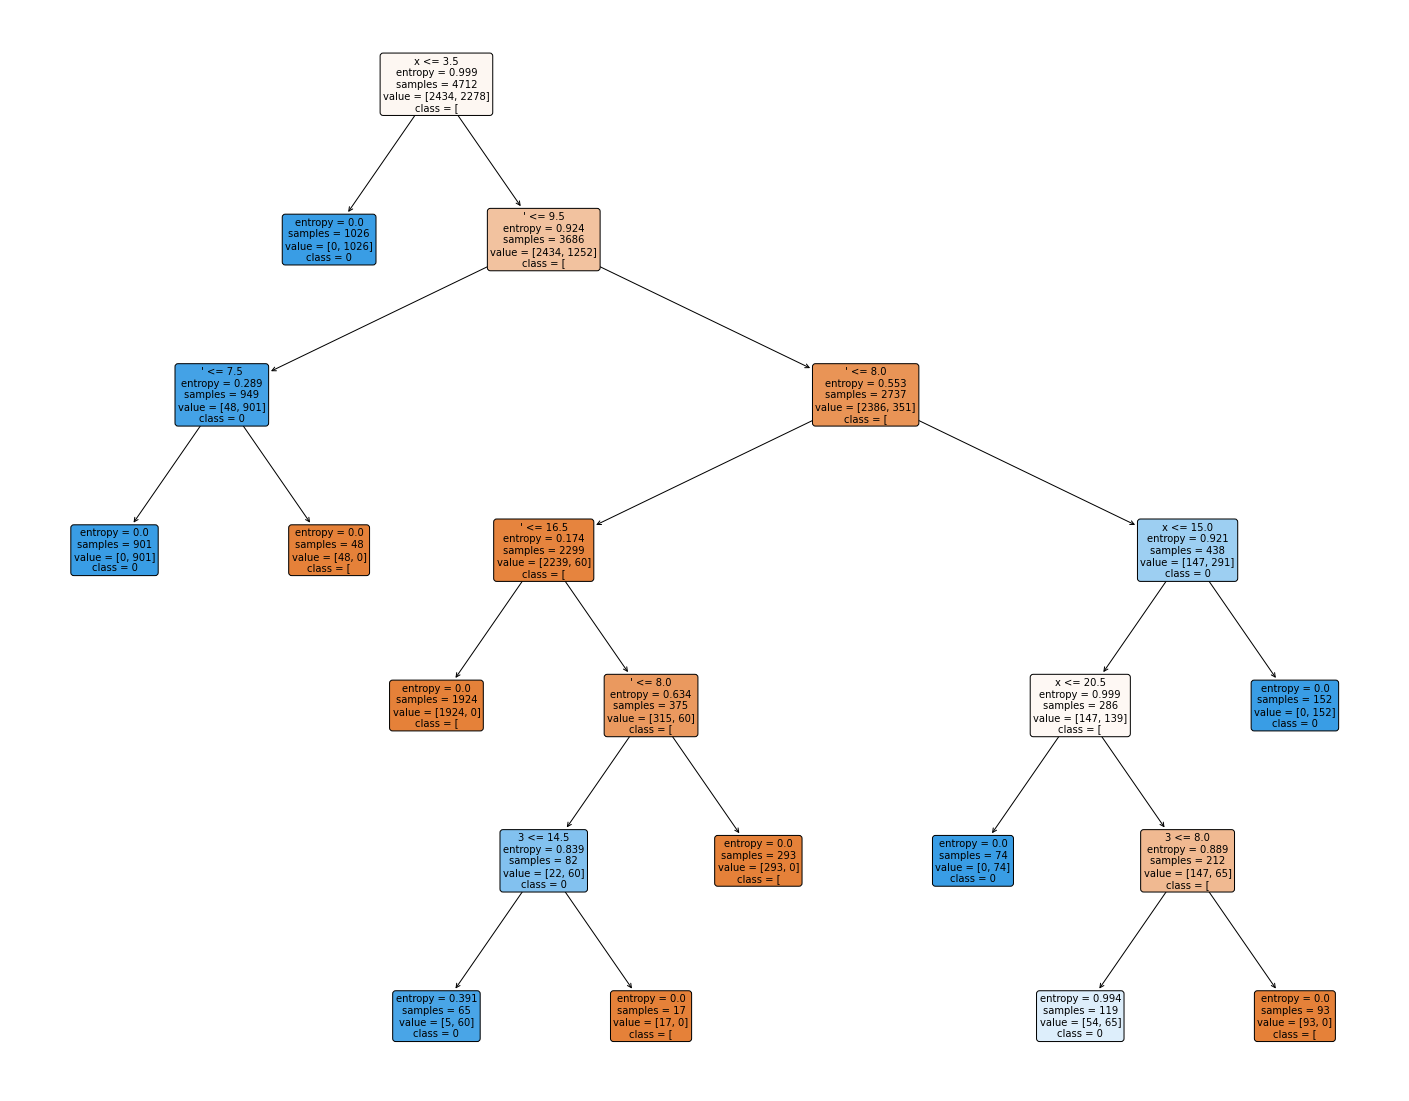

In [314]:
feature_names = df1.columns[1:22]
print (feature_names)
target_names = df1['y'].unique().tolist()

model = dtc(criterion = 'entropy', max_depth = 6)
model.fit(df1_X_train, df1_Y_train)

plot_tree(model, 
          feature_names = str(feature_names), 
          class_names = str(target_names), 
          filled = True, 
          rounded = True, fontsize = 10)
rcParams['figure.figsize'] = (25, 20)

## 2. What is the accuracy of this decision tree on the test data?

In [287]:
df1_Y_train = df1['y'].values
df1_Y_train = df1_Y_train.reshape(-1,1)
print('df1_Y_train dimention: ',df1_Y_train.shape)
df1_X_train = df1[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X dimnetion: ',df1_X_train.shape)

df2_Y_test = df2['y'].values
df2_Y_test = df2_Y_test.reshape(-1,1)

df2_X_test = df2[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values




model = dtc(criterion = 'entropy', max_depth = 6)
model.fit(df1_X_train, df1_Y_train)

pred_model = model.predict(df2_X_test)

print ('Accuracy of the model is:', accuracy_score(df2_Y_test, pred_model) )

df1_Y_train dimention:  (4712, 1)
X dimnetion:  (4712, 22)
Accuracy of the model is: 0.9868112543962485


## 3. Now consider arbitrary input data. Suppose that you decide to limit yourself to decision trees of height one, i.e., only one split. Is the tree produced by the information gain heuristic optimal on the training data (that is, no other decision tree has higher accuracy)?

In [315]:
df1_Y_train = df1['y'].values
df1_Y_train = df1_Y_train.reshape(-1,1)
print('df1_Y_train dimention: ',df1_Y_train.shape)
df1_X_train = df1[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X dimnetion: ',df1_X_train.shape)

df2_Y_test = df2['y'].values
df2_Y_test = df2_Y_test.reshape(-1,1)

df2_X_test = df2[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values




model = dtc(criterion = 'entropy', max_depth = 1)
model.fit(df1_X_train, df1_Y_train)

pred_model = model.predict(df2_X_test)

print ('Accuracy of the model is:', accuracy_score(df2_Y_test, pred_model) )

df1_Y_train dimention:  (4712, 1)
X dimnetion:  (4712, 22)
Accuracy of the model is: 0.7256740914419695


It is not optimal as the accuracy of the model is only 72.57%. The process of decision making can only be based on one attribute.

# Problem 4: Cross-Validation (20 pts)

Using a single tuning set for the hyperparameters can yield an unreliable predictor of the class
label, i.e., maybe it was not a representative sample of the data, plus some data is \wasted" using
this approach. An alternative approach that is particularly applicable for small data sets is $k$-fold
cross-validation.

1. Partition the non-test data into $k$ equally sized buckets.
2. For each possible set of hyperparameters you will train the model using exactly $k-1$ of the
partitions while the held out partition is used as a validation data set.
3. As there are $k$ dierent ways to hold out one partition, all $k$ possibilities are tried and the
average validation set accuracy (as measured by the appropriate held-out data) of the $k$
different models learned for each of the hyperparameter settings is used to select the winning
hyperparameters.
4. Finally, the model is retrained using all of the non-test data with the winning hyperparameters
and then evaluated using the test data.

Apply 10-fold cross validation to fit an SVM with slack classifier (no feature maps) to the data
set wdbc train.data (each row corresponds to a single data observation and the class label +1/-1 is
the first entry in each row). Use the same hyperparameter ranges as Problem 1.1 and the partitions
for cross validation should be selected as equally sized contiguous blocks of data starting from the
first data element. Report the best setting of the hyperparameters and the accuracy on the test
set wdbc test.data.

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


col_names = ['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
Q4TrainData =  pd.read_csv('wdbc_train.data', sep="," ,names = col_names)

print (Q4TrainData)

     y      x1     x2      x3      x4       x5       x6        x7        x8  \
0   -1  11.250  14.78   71.38   390.0  0.08306  0.04458  0.000974  0.002941   
1    1  19.400  23.50  129.10  1155.0  0.10270  0.15580  0.204900  0.088860   
2    1  25.220  24.91  171.50  1878.0  0.10630  0.26650  0.333900  0.184500   
3   -1  12.630  20.76   82.15   480.4  0.09933  0.12090  0.106500  0.060210   
4   -1  12.160  18.03   78.29   455.3  0.09087  0.07838  0.029160  0.015270   
..  ..     ...    ...     ...     ...      ...      ...       ...       ...   
295  1  18.810  19.98  120.90  1102.0  0.08923  0.05884  0.080200  0.058430   
296 -1   9.295  13.90   59.96   257.8  0.13710  0.12250  0.033320  0.024210   
297  1  21.090  26.57  142.70  1311.0  0.11410  0.28320  0.248700  0.149600   
298 -1   9.042  18.90   60.07   244.5  0.09968  0.19720  0.197500  0.049080   
299 -1  14.060  17.18   89.75   609.1  0.08045  0.05361  0.026810  0.032510   

         x9      x10  
0    0.1773  0.06081  
1    

In [337]:
Y_train = Q4TrainData['y'].values
Y_train = Y_train.reshape(-1,1)
print('Y_train dimention: ',Y_train.shape)
X_train = Q4TrainData[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']].values
print('X_train dimnetion: ',X_train.shape)

Y_train dimention:  (300, 1)
X_train dimnetion:  (300, 10)


In [339]:
kernel_option = 'Polynomial'
poly_case = 'Linear'
dims = {'Linear':10}
for C_Values in [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]:
  print('\nCurrent C: ',C_Values)
  lambdas = SVM_with_Kernel(C_Values,X_train,Y_train,kernel_option, poly_case)

  modified_X_train = np.zeros([Y_train.shape[0],dims[poly_case]])
  for n in range(Y_train.shape[0]):
    modified_X_train[n] = poly_func(X_train[n],poly_case)

  w = ((Y_train * lambdas).T @ modified_X).reshape(-1,1);
  S = (lambdas >= 0).flatten();
  #print(S)
  b = Y_train[S] - np.dot(modified_X_train[S], w);
  #print('lambdas = ',lambdas[lambdas > 0])

  Y_pred = modified_X.dot(w) + b[0]
  print('w = ', w.flatten())
  print('b = ', b[0])
  res = sum([int(Y_train[i] == np.sign(Y_pred[i])) for i in range(Y_train.shape[0])])
  print('Accuracy:', res)


Current C:  0.0001
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  0.001
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  0.01
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  0.1
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  1.0
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  10.0
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  100.0
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  1000.0
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182

Current C:  10000.0
w =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =  [-1.]
Accuracy: 182
